In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from tensorflow.keras import *
from keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
len(x_train),len(y_train),len(x_test),len(y_test)

(60000, 60000, 10000, 10000)

In [3]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [4]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [5]:
x_train=x_train/255
x_test=x_test/255


In [6]:
def plot(index):
    plt.figure(figsize=(5,2))
    plt.imshow(x_train[index])

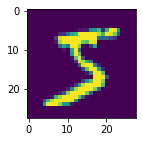

In [7]:
plot(0)

In [8]:
augumentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(28,28,1)),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.9),
    
    
])

In [9]:
model=tf.keras.Sequential([
    augumentation,
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",strides=1,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=1,activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.5653 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2276 - accuracy: 0.9315
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1744 - accuracy: 0.9474
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1473 - accuracy: 0.9549
Epoch 5/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1345 - accuracy: 0.9596


In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0627 - accuracy: 0.9799


[0.06273355334997177, 0.9799000024795532]

In [17]:
new_model=model.save("trained_hand_written")

INFO:tensorflow:Assets written to: trained_hand_written\assets


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)             

In [19]:
predict=model.predict([x_test])

In [44]:
np.argmax(predict[0])

TypeError: 'function' object is not subscriptable

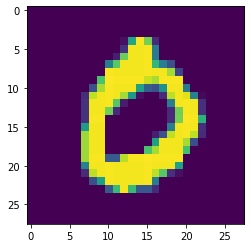

In [45]:
plt.imshow(x_test[3])

In [22]:
from  PIL import ImageGrab,Image
import tkinter as tk
import win32gui

In [48]:
def draw_lines(event):
    x=event.x
    y=event.y
    canvas.create_line(x-5,y-5,x+5,y+5,fill="black")
    
def recognize():
    info=canvas.winfo_id()
    rect=win32gui.GetWindowRect(info)
    image=ImageGrab.grab(rect)
    predict(image)
    
def predict(im):
    im=im.resize((28,28))
    plt.imshow(im)
    im=im.convert('L')
    im=np.array(im)
    im=im.reshape(1,28,28,1)
    im=im/255
    res=model.predict([im])
    print(np.argmax(res))
    
    
def clear():
    canvas.delete("all")

8


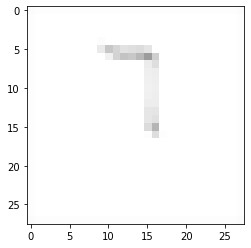

In [49]:
root=tk.Tk()
root.geometry("500x500")

canvas=tk.Canvas(root,width=300,height=300,bg="white",cursor="cross")
clear=tk.Button(root,text="clear",command=clear)
recognize=tk.Button(root,text="Recognize",command=recognize)

canvas.pack()
clear.pack()
recognize.pack()

canvas.bind("<B1-Motion>",draw_lines)

root.mainloop()